In [1]:
print("""
@Description: 使用 NLTK 进行文本分类和词性标注
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-08-21 15:13:20
""")


@Description: 使用 NLTK 进行文本分类和词性标注
@Author(s): Stephen CUI
@LastEditor(s): Stephen CUI
@CreatedTime: 2023-08-21 15:13:20



In [129]:
import nltk
# 该命令会打开 NLTK 下载器，你可以在其中选择所需的包或集合。
# 用🔽按钮选中，然后点击 Enter
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

本章样例所需安装的模块。

|No.|包 名|描 述|
|---|---|---|
|1|averaged_perceptron_tagger||
|1|averaged_perceptron_tagger_ru||
|3|brown|Brown 文本语料库|
|4|gutenberg|Gutenberg 文本语料库|
|5|max_ne_chunker|用于文本分块的模块|
|6|movie_reviews|电影评论情感极性数据|
|7|product_reviews_1|基本电影评论语料库|
|8|punkt|分词、分句模块|
|9|treebank|Peen Treebank 数据集样例|
|10|twitter_samples|Twitter 消息样例|
|11|universal_tagset|通用词性标注映射|
|12|webtext|Web 文本语料库|
|13|wordnet|WordNet 语料库|
|14|words|单词列表|

## 文本预处理及探索性分析

### 分词

In [3]:
from nltk.corpus import twitter_samples as ts

In [4]:
ts.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [5]:
samples_tw = ts.strings('positive_tweets.json')
len(samples_tw)

5000

In [6]:
samples_tw[100]

"@metalgear_jp @Kojima_Hideo I want you're T-shirts ! They are so cool ! :D"

In [7]:
samples_tw[1]

'@Lamb2ja Hey James! How odd :/ Please call our Contact Centre on 02392441234 and we will be able to assist you :) Many thanks!'

In [8]:
from nltk.tokenize import word_tokenize as wtoken

In [10]:
print(wtoken(samples_tw[100]))

['@', 'metalgear_jp', '@', 'Kojima_Hideo', 'I', 'want', 'you', "'re", 'T-shirts', '!', 'They', 'are', 'so', 'cool', '!', ':', 'D']


In [11]:
samples_tw[100]

"@metalgear_jp @Kojima_Hideo I want you're T-shirts ! They are so cool ! :D"

In [12]:
from nltk.tokenize import wordpunct_tokenize

In [13]:
print(wordpunct_tokenize(samples_tw[100]))

['@', 'metalgear_jp', '@', 'Kojima_Hideo', 'I', 'want', 'you', "'", 're', 'T', '-', 'shirts', '!', 'They', 'are', 'so', 'cool', '!', ':', 'D']


In [14]:
from nltk import regexp_tokenize
patn = '\w+'
print(regexp_tokenize(samples_tw[100], patn))

['metalgear_jp', 'Kojima_Hideo', 'I', 'want', 'you', 're', 'T', 'shirts', 'They', 'are', 'so', 'cool', 'D']


In [15]:
patn = '\w+|[!, \-,] '
print(regexp_tokenize(samples_tw[100], patn))

['metalgear_jp', 'Kojima_Hideo', 'I', 'want', 'you', 're', 'T', 'shirts', '! ', 'They', 'are', 'so', 'cool', '! ', 'D']


### 词干提取

In [16]:
import nltk
from nltk.stem import PorterStemmer
stemming = PorterStemmer()

In [17]:
stemming.stem("enjoying")

'enjoy'

In [18]:
stemming.stem("enjoys")

'enjoy'

In [19]:
stemming.stem("enjoyable")

'enjoy'

In [20]:
stemming.stem("variation")

'variat'

In [21]:
stemming.stem("variate")

'variat'

### 去除停用词

In [22]:
from nltk.corpus import stopwords

In [25]:
sw_l = stopwords.words('english')
print(sw_l[20: 40])

['himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this']


In [29]:
example_text = "This is an example sentence to test stopwords"
example_text_without_stopwords = [word for word in example_text.split() if word not in sw_l]
example_text_without_stopwords

['This', 'example', 'sentence', 'test', 'stopwords']

In [36]:
from nltk.corpus import gutenberg
words_in_hamlet = gutenberg.words('shakespeare-hamlet.txt')
words_in_hamlet_without_sw = [word for word in words_in_hamlet if word not in sw_l]
len(words_in_hamlet_without_sw) * 100 / len(words_in_hamlet)

69.26124197002142

### 探索性分析
获得词元数据后，常用的基本分析之一是对单词或词元及其在文档中的分布进行计数，从而更多地了解文档中的主要话题。

In [38]:
import nltk
from nltk.corpus import webtext

In [40]:
webtext_sentences = webtext.sents("firefox.txt")
webtext_words  = webtext.words("firefox.txt")
len(webtext_sentences), len(webtext_words)

(1144, 102457)

In [47]:
vocabulary = set(webtext_words)
len(vocabulary)

8296

为了获得文本的频数分布，可以利用 nltk.FreqDist() 函数来获取文本中使用最为频繁的单词。

In [66]:
frequency_dist = nltk.FreqDist(webtext_words)
# 按照 value 排序的 key
print(sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[:10])

['.', 'in', 'to', '"', 'the', "'", 'not', '-', 'when', 'on']


In [71]:
import matplotlib.pyplot as plt

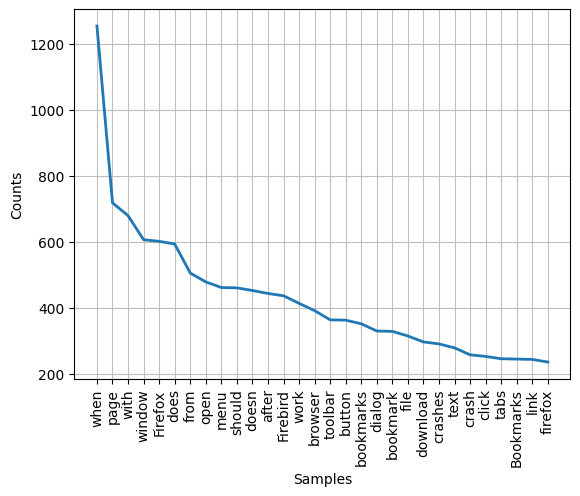

In [74]:
large_words = dict([(k, v) for k, v in frequency_dist.items() if len(k) > 3])
frequency_dist = nltk.FreqDist(large_words)
frequency_dist.plot(30, cumulative=False)
plt.show()

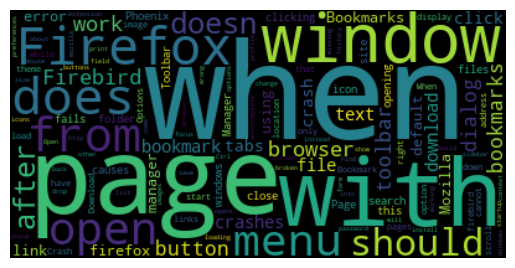

In [82]:
from wordcloud import WordCloud
wcloud = WordCloud().generate_from_frequencies(frequency_dist)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

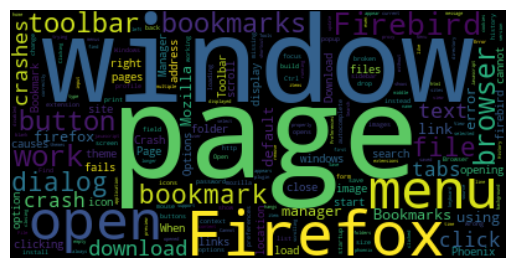

In [90]:
large_words_without_sw = dict([(k, v) for k, v in frequency_dist.items() if len(k) > 3 and k not in sw_l])

frequency_dist_without_sw = nltk.FreqDist(large_words_without_sw)

wcloud = WordCloud().generate_from_frequencies(frequency_dist_without_sw)
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [93]:
assert "when" not in large_words_without_sw

In [94]:
assert "from" not in large_words_without_sw

## 词性标注

### 词性标注定义

In [115]:
from nltk.corpus import brown

In [116]:
brown.tagged_words()[30:40]

[('term-end', 'NN'),
 ('presentments', 'NNS'),
 ('that', 'CS'),
 ('the', 'AT'),
 ('City', 'NN-TL'),
 ('Executive', 'JJ-TL'),
 ('Committee', 'NN-TL'),
 (',', ','),
 ('which', 'WDT'),
 ('had', 'HVD')]

In [117]:
brown.tagged_words(tagset="universal")[30:40]

[('term-end', 'NOUN'),
 ('presentments', 'NOUN'),
 ('that', 'ADP'),
 ('the', 'DET'),
 ('City', 'NOUN'),
 ('Executive', 'ADJ'),
 ('Committee', 'NOUN'),
 (',', '.'),
 ('which', 'DET'),
 ('had', 'VERB')]

### 词性标注的应用
词性标注可在命名实体识别（NER）、情感分析、问答和单词消歧中得到应用。

In [125]:
from nltk.tag import pos_tag
text1 = nltk.word_tokenize("I left the room")
text2 = nltk.word_tokenize("Left of the room")

In [126]:
text1

['I', 'left', 'the', 'room']

In [127]:
text2

['Left', 'of', 'the', 'room']

In [128]:
nltk.pos_tag(text1,tagset='universal')

[('I', 'PRON'), ('left', 'VERB'), ('the', 'DET'), ('room', 'NOUN')]

In [130]:
nltk.pos_tag(text2,tagset='universal')

[('Left', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('room', 'NOUN')]